# Metodos de aprendizaje automático

### Cortes Cataño, Carlos Felipe: cfcortesc@javerianacali.edu.co
### Mora Cañas, Carlos: mora2406@javerianacali.edu.co

##### Criterios Desertor = 1 - No = 0

## Carga librerías y datos

Librerías

In [261]:
#Data Manipulation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Model
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler

#Metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics  import r2_score
from sklearn.metrics import ConfusionMatrixDisplay

#PCA
from sklearn import decomposition
from sklearn.decomposition import PCA

#Balanceo
from imblearn.over_sampling import SMOTE, SMOTENC
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.utils import resample

import sklearn.datasets as datasets
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sqlalchemy import create_engine
import plotly.express as px
#from pandas_profiling import ProfileReport

import re
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
import xgboost as xgb
from sklearn.datasets import make_moons

import warnings
warnings.filterwarnings('ignore') # Para evitar los avisos molestos
%matplotlib inline


Datos

In [205]:
data_raw = pd.read_csv("../data/outputs/principal_v0.5.csv" ,sep=",", encoding='latin-1', low_memory = False,decimal = ',')
data_raw.head(2)

,codigoPrograma,tomador,edad,Qinscritos,Qmascotas,valorCuota,QrecauExitoso,QrecauFallido,nombrePlan,profesionTomador,...,reintegrado,duracionActivoI,duracionActivoF,incrementoCuota,diaPago,nivelEconomico,barrio,localidad,latitud,longitud
0,59,Luis Roberto Murillo,68.0,5.0,0.0,16100,6,31,NaN,NaN,...,0,1716,757,1000.0,10,1.0,0,La Dorada,5.47998927,-74.67475735
1,84,Indris Isabel Morales Herrera,30.0,Otros,0.0,31100,22,16,NaN,NaN,...,0,1649,1649,1000.0,16,NaN,0,Manizales,5.475582019363229,-74.67299778430248


In [206]:
df = data_raw[['codigoPrograma','edad','Qinscritos','Qmascotas','valorCuota','QrecauExitoso','QrecauFallido','estado','reintegrado','duracionActivoI','duracionActivoF']]
df.head(2)

,codigoPrograma,edad,Qinscritos,Qmascotas,valorCuota,QrecauExitoso,QrecauFallido,estado,reintegrado,duracionActivoI,duracionActivoF
0,59,68.0,5.0,0.0,16100,6,31,0,0,1716,757
1,84,30.0,Otros,0.0,31100,22,16,0,0,1649,1649


## Etapa 1: Entendimiento de los datos

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   codigoPrograma   8156 non-null   int64 
 1   edad             8156 non-null   object
 2   Qinscritos       8156 non-null   object
 3   Qmascotas        8156 non-null   object
 4   valorCuota       8156 non-null   int64 
 5   QrecauExitoso    8156 non-null   int64 
 6   QrecauFallido    8156 non-null   int64 
 7   estado           8156 non-null   int64 
 8   reintegrado      8156 non-null   int64 
 9   duracionActivoI  8156 non-null   int64 
 10  duracionActivoF  8156 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 701.0+ KB


In [208]:
# Eliminar filas con valores 'Otros' en 'Qinscritos'
data = df[df['Qinscritos'] != 'Otros']

# Convertir 'Qinscritos' a tipo numérico
data['Qinscritos'] = pd.to_numeric(data['Qinscritos'])
data.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8032 entries, 0 to 8155
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   codigoPrograma   8032 non-null   int64  
 1   edad             8032 non-null   object 
 2   Qinscritos       8032 non-null   float64
 3   Qmascotas        8032 non-null   object 
 4   valorCuota       8032 non-null   int64  
 5   QrecauExitoso    8032 non-null   int64  
 6   QrecauFallido    8032 non-null   int64  
 7   estado           8032 non-null   int64  
 8   reintegrado      8032 non-null   int64  
 9   duracionActivoI  8032 non-null   int64  
 10  duracionActivoF  8032 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 753.0+ KB


0    8032
dtype: int64

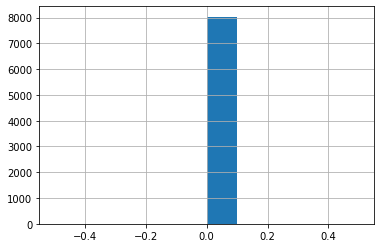

In [209]:
data.isnull().sum(axis=1).hist()
data.isnull().sum(axis=1).value_counts()

In [210]:
data.isna().sum()

codigoPrograma     0
edad               0
Qinscritos         0
Qmascotas          0
valorCuota         0
QrecauExitoso      0
QrecauFallido      0
estado             0
reintegrado        0
duracionActivoI    0
duracionActivoF    0
dtype: int64

In [211]:
numeric_variables = data.columns

In [212]:
print("Medidas de centralidad y desviación para atributos numéricos:")

for var in numeric_variables:
    data[var] = pd.to_numeric(data[var])

data[numeric_variables].describe().T

Medidas de centralidad y desviación para atributos numéricos:


,count,mean,std,min,25%,50%,75%,max
codigoPrograma,8032.0,67480.911728,53138.372983,59.0,23018.5,51490.5,122083.00,171953.0
edad,8032.0,47.233690,13.557821,18.0,37.0,47.0,57.00,97.0
Qinscritos,8032.0,3.970369,2.445597,0.0,2.0,5.0,6.00,8.0
Qmascotas,8032.0,0.234686,0.572109,0.0,0.0,0.0,0.00,6.0
valorCuota,8032.0,20658.306026,9625.020828,1400.0,16100.0,19100.0,23225.00,62400.0
QrecauExitoso,8032.0,13.211404,10.816044,1.0,6.0,10.0,17.00,84.0
QrecauFallido,8032.0,11.884338,12.842026,1.0,3.0,8.0,16.00,127.0
estado,8032.0,0.307146,0.461339,0.0,0.0,0.0,1.00,1.0
reintegrado,8032.0,0.486056,0.499837,0.0,0.0,0.0,1.00,1.0
duracionActivoI,8032.0,1870.597485,2010.802442,182.0,705.0,1179.0,1982.50,10965.0


In [213]:
comportamiento_numericos = make_subplots(rows=2, cols=3)
count = 1
for var in data[numeric_variables[0:3]]:
    comportamiento_numericos.append_trace(go.Box(y=data[var], name=var), 1, count)
    count +=1
count = 1
for var in data[numeric_variables[3:6]]:
    comportamiento_numericos.append_trace(go.Box(y=data[var], name=var), 2, count)
    count +=1
count = 1

comportamiento_numericos.update_layout(
    title_text='Comportamiento datos atributos numéricos ',
    yaxis_title_text='Conteo',
    showlegend=False
)
comportamiento_numericos.show()


In [214]:
data.isnull().sum(axis=1).value_counts()

0    8032
dtype: int64

Número de muestras y atributos

In [215]:
shape = data.shape
print("Cuál es el número de registros?")
print(shape[0])
print("Cuál es el número de atributos?")
print(shape[1])

Cuál es el número de registros?
8032
Cuál es el número de atributos?
11


Medidas de centralidad y dispersión por cada atributo de acuerdo a su tipo

In [216]:
data["estado"].unique()

array([0, 1])

In [217]:
print("Conteo grupos:")
data.groupby("estado").count()["codigoPrograma"]

Conteo grupos:


estado
0    5565
1    2467
Name: codigoPrograma, dtype: int64

<h5 style="color:orange"> Observamos que se entregan datos desbalanceados <h5>

Calcular la matriz de correlación entre los atributos de entrada

Procedemos a convertir los datos en númericos para presentar matriz de correlación

In [218]:
columns = data.columns

In [219]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for column in columns:
    data[column] = labelencoder.fit_transform(data[column])

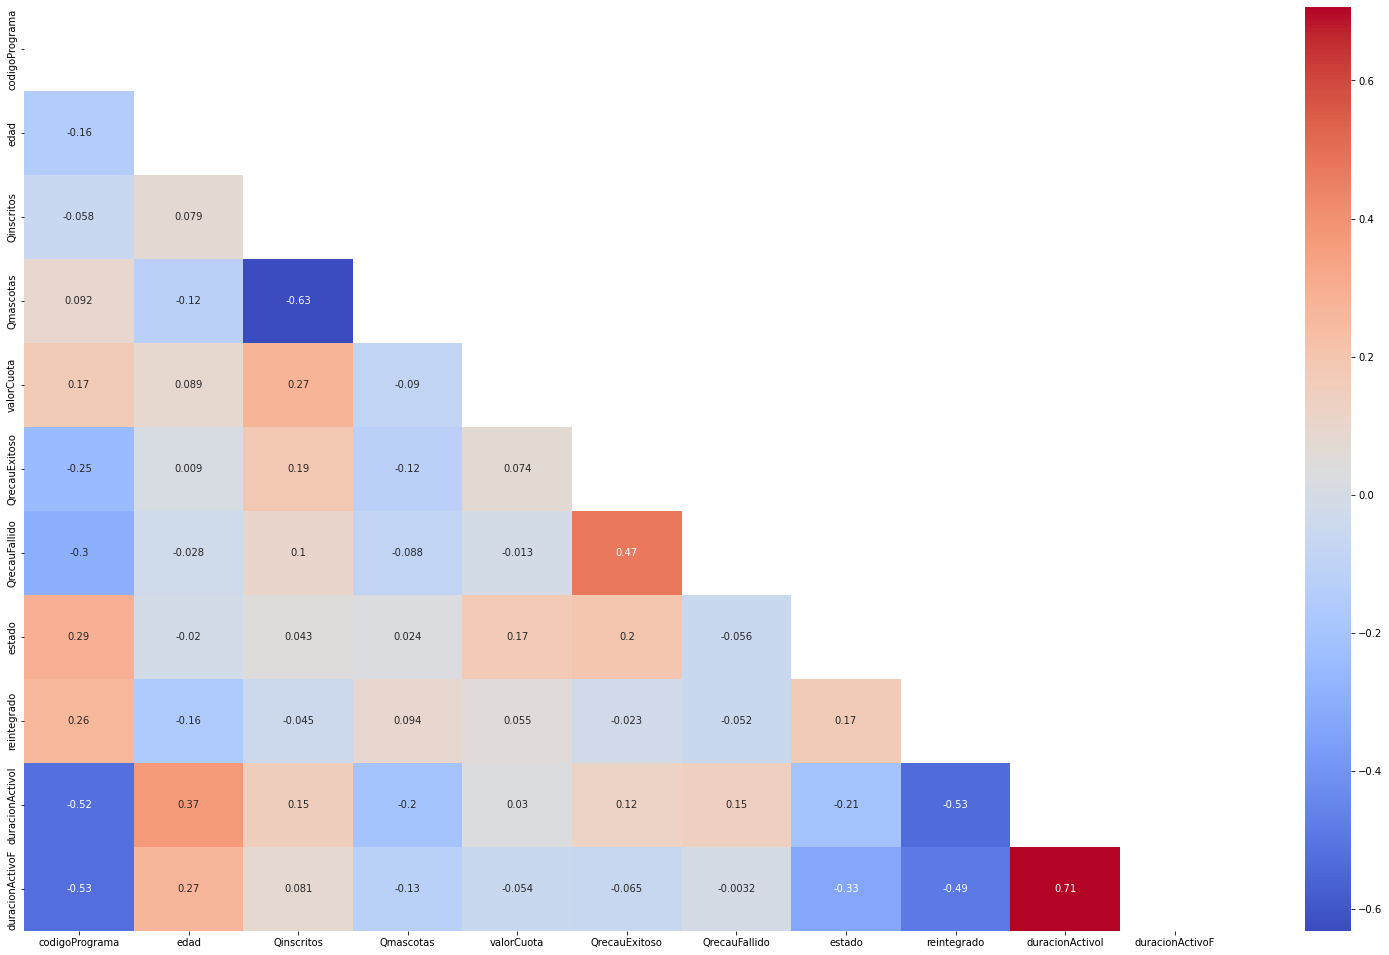

In [220]:
upp_mat = np.triu(data.corr())

correlation_matrix_a, ax = plt.subplots(figsize=(27,17))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', mask = upp_mat)
correlation_matrix_a.show()


<h style="color:orange">Se obvserva multicolinealidad entre duracón activo final e activo inicial el cual supera el 0.70, lo eliminamos</h>

In [221]:
data.drop("duracionActivoI", axis=1, inplace=True)

## Etapa 2: Modelo inicial Y PCA

In [222]:
#Definición de algoritmo para todos los modelos
logisticRegr= LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
#Copia de Dataset para prepración y modelado
data_model = data

In [223]:
X_train, X_test, y_train, y_test = train_test_split(
    data_model.drop(['estado'], axis=1), data_model[['estado']], test_size=0.30, random_state=100)
print("Tamaño sets entrenamiento")
print(X_train.shape, y_train.shape)
print("Tamaño sets pruebas")
print(X_test.shape, y_test.shape)

Tamaño sets entrenamiento
(5622, 9) (5622, 1)
Tamaño sets pruebas
(2410, 9) (2410, 1)


In [224]:
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)


In [225]:
unique, counts = np.unique(labelencoder.inverse_transform(predictions), return_counts=True)
predictions_df = pd.DataFrame(counts,unique).rename(columns={0:"counts"})
total = sum(counts)
predictions_df["percentage"] = round(predictions_df["counts"] / total*100)
predictions_df

,counts,percentage
105,1837,76.0
106,573,24.0


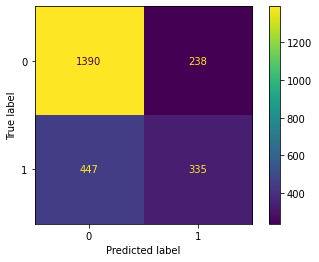

In [226]:
cm = confusion_matrix(y_test, predictions)
confusion = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=logisticRegr.classes_)
confusion.plot()


In [227]:
modelo_base_metrics = classification_report(y_test, predictions)
print(modelo_base_metrics)


              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1628
           1       0.58      0.43      0.49       782

    accuracy                           0.72      2410
   macro avg       0.67      0.64      0.65      2410
weighted avg       0.70      0.72      0.70      2410



### Revisión PCA

## Etapa 3: Balanceos

### Balanceo over_sampling 50-50

<AxesSubplot:>

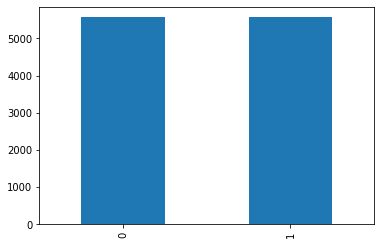

In [228]:
sm = SMOTE() #para variables predictoras numéricas

x= data_model.drop('estado', axis=1)
y= data_model['estado']
X_bal, Y_bal = sm.fit_resample(x,y)

# Creamos un dataframe con los resultados
data_1  = pd.DataFrame(columns=x.columns.values, data=X_bal)
data_1['estado']=Y_bal
data_1['estado'].value_counts().plot(kind='bar')

In [229]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test # CON Balanceo

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    data_1.drop(['estado'], axis=1), data_1['estado'], test_size=0.30, random_state=100)

print("Tamaño set entrenamiento")
print(X_train_bal.shape, y_train_bal.shape)
print("Tamaño set pruebas")
print(X_test_bal.shape, y_test_bal.shape)

Tamaño set entrenamiento
(7791, 9) (7791,)
Tamaño set pruebas
(3339, 9) (3339,)


In [230]:
logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train_bal, y_train_bal)
predictions_bal = logisticRegr.predict(X_test_bal)
unique, counts = np.unique(labelencoder.inverse_transform(predictions_bal), return_counts=True)
predictions_df = pd.DataFrame(counts,unique).rename(columns={0:"counts"})
total = sum(counts)
print("Tasa de 0 y 1 en predicción")
predictions_df["percentage"] = round(predictions_df["counts"] / total*100)
predictions_df


Tasa de 0 y 1 en predicción


,counts,percentage
105,1502,45.0
106,1837,55.0


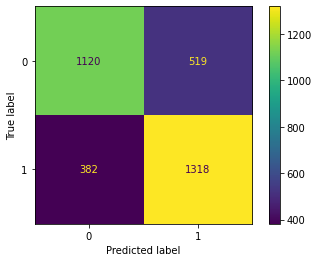

In [231]:
cm = confusion_matrix(y_test_bal, predictions_bal)
confusion = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=logisticRegr.classes_)
confusion.plot()


In [232]:
metrics_balanced = metrics.classification_report(
    y_true=y_test_bal, y_pred=predictions_bal)
print(metrics_balanced)


              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1639
           1       0.72      0.78      0.75      1700

    accuracy                           0.73      3339
   macro avg       0.73      0.73      0.73      3339
weighted avg       0.73      0.73      0.73      3339



<h5 style="color:orange">Aumentamos la capacidad de predicción de desertores a 0.77 </h5>

### Balanceo under_sampling 50-50

In [233]:
def random_undersample(X, y, majority_class):
    # Separa las instancias de la clase mayoritaria y minoritaria
    majority_X = X[y == majority_class]
    minority_X = X[y != majority_class]
    minority_y = y[y != majority_class]

    # Realiza undersampling aleatorio en la clase mayoritaria
    majority_X_undersampled = resample(majority_X,
                                       replace=False,  # No reemplazar las instancias
                                       # Igual número de instancias que la clase minoritaria
                                       n_samples=len(minority_y),
                                       random_state=42)  # Fijar una semilla para reproducibilidad

    # Combina las instancias undersampled de la clase mayoritaria con la clase minoritaria
    X_undersampled = np.concatenate([majority_X_undersampled, minority_X])
    y_undersampled = np.concatenate(
        [np.repeat(majority_class, len(minority_y)), minority_y])

    return X_undersampled, y_undersampled


<AxesSubplot:xlabel='0'>

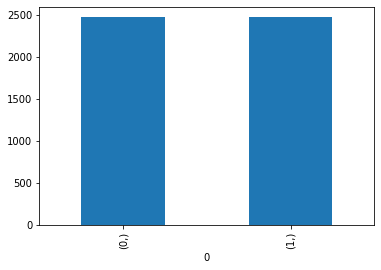

In [234]:
X_undersampled, y_undersampled = random_undersample(
    data_model.drop("estado", axis=1), data_model["estado"], 0)
pd.DataFrame(y_undersampled).value_counts().plot(kind='bar')


In [235]:
X_train, X_test, y_train, y_test = train_test_split(
    X_undersampled, y_undersampled, test_size=0.30, random_state=100)
print("Tamaño sets entrenamiento")
print(X_train.shape, y_train.shape)
print("Tamaño sets pruebas")
print(X_test.shape, y_test.shape)


Tamaño sets entrenamiento
(3453, 9) (3453,)
Tamaño sets pruebas
(1481, 9) (1481,)


In [236]:
logisticRegr.fit(X_train, y_train)
predictions_bal_down = logisticRegr.predict(X_test)
unique, counts = np.unique(labelencoder.inverse_transform(predictions_bal_down), return_counts=True)
predictions_df = pd.DataFrame(counts,unique).rename(columns={0:"counts"})
total = sum(counts)
predictions_df["percentage"] = round(predictions_df["counts"] / total*100)
predictions_df

,counts,percentage
105,600,41.0
106,881,59.0


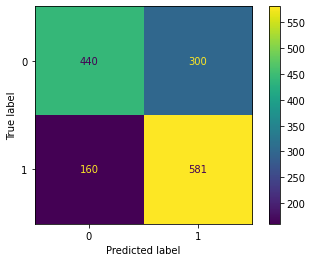

In [237]:
cm = confusion_matrix(y_test, predictions_bal_down)
confusion = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=logisticRegr.classes_)
confusion.plot()


In [238]:
metrics_balanced_down = metrics.classification_report(
    y_true=y_test, y_pred=predictions_bal_down)
print(metrics_balanced_down)


              precision    recall  f1-score   support

           0       0.73      0.59      0.66       740
           1       0.66      0.78      0.72       741

    accuracy                           0.69      1481
   macro avg       0.70      0.69      0.69      1481
weighted avg       0.70      0.69      0.69      1481



In [239]:
print(metrics_balanced)

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1639
           1       0.72      0.78      0.75      1700

    accuracy                           0.73      3339
   macro avg       0.73      0.73      0.73      3339
weighted avg       0.73      0.73      0.73      3339



In [240]:
data_pca = data_model
data_pca.head(2)

,codigoPrograma,edad,Qinscritos,Qmascotas,valorCuota,QrecauExitoso,QrecauFallido,estado,reintegrado,duracionActivoF
0,0,50,5,0,79,5,30,0,0,645
2,1,38,2,0,193,6,0,1,0,984


In [241]:
X_train, X_test, y_train, y_test = train_test_split(data_pca.drop(['estado'], axis=1),
                                                                data_pca['estado'], test_size=0.30, random_state=100)
print("Tamaño set entrenamiento")
print(X_train.shape, y_train.shape)
print("Tamaño set pruebas")
print(X_test.shape, y_test.shape)

Tamaño set entrenamiento
(5622, 9) (5622,)
Tamaño set pruebas
(2410, 9) (2410,)


In [242]:
pca = decomposition.PCA(0.95)
X_pca=pca.fit(X_train)
comps=pca.n_components_ 
comps

2

In [243]:
pca = PCA(comps)

newdf_train = pca.fit_transform(X_train)
features_train = pd.DataFrame(newdf_train)

newdf_valid = pca.transform(X_test)
features_valid = pd.DataFrame(newdf_valid) 

In [244]:
logisticRegr.fit(features_train, y_train)
predictions_pca = logisticRegr.predict(features_valid)
unique, counts = np.unique(labelencoder.inverse_transform(predictions_pca), return_counts=True)
predictions_df = pd.DataFrame(counts,unique).rename(columns={0:"counts"})
total = sum(counts)
predictions_df["percentage"] = round(predictions_df["counts"] / total*100)
predictions_df

,counts,percentage
105,1990,83.0
106,420,17.0


In [245]:
#Validar Precision
pca_results = round(accuracy_score(y_test, predictions_pca), 3)
pca_results

0.677

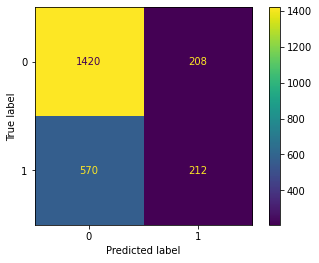

In [246]:
cm = confusion_matrix(y_test, predictions_pca)
confusion = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=logisticRegr.classes_)
confusion.plot()


In [247]:
metrics_pca = metrics.classification_report( y_true=y_test, y_pred=predictions_pca)
print(metrics_pca)

              precision    recall  f1-score   support

           0       0.71      0.87      0.78      1628
           1       0.50      0.27      0.35       782

    accuracy                           0.68      2410
   macro avg       0.61      0.57      0.57      2410
weighted avg       0.65      0.68      0.64      2410



### Resumen

Oversampling es la mejor opción para nuestro caso donde los datos se balancean en un 50-50.Mejoramos el rendimiento 0.77, sin afectar el calculo para la etiqueta 0

In [248]:
print("Modelo base")
print(modelo_base_metrics)
print("PCA")
print(metrics_pca)
print("Balanceo creando ejemplos ")
print(metrics_balanced)

print("Balanceo reduciendo la cantidad de ejemplos")
print(metrics_balanced_down)

Modelo base
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1628
           1       0.58      0.43      0.49       782

    accuracy                           0.72      2410
   macro avg       0.67      0.64      0.65      2410
weighted avg       0.70      0.72      0.70      2410

PCA
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      1628
           1       0.50      0.27      0.35       782

    accuracy                           0.68      2410
   macro avg       0.61      0.57      0.57      2410
weighted avg       0.65      0.68      0.64      2410

Balanceo creando ejemplos 
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1639
           1       0.72      0.78      0.75      1700

    accuracy                           0.73      3339
   macro avg       0.73      0.73      0.73      3339
weighted avg       0.73      0.

<AxesSubplot:>

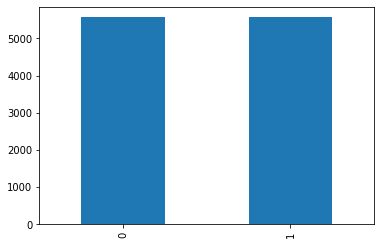

In [257]:
input= data_1
# Creamos un dataframe con los resultados
input_x = input.drop("estado", axis=1)
input_y = input["estado"]
input['estado'].value_counts().plot(kind='bar')


## Fase 4: Modelos - Validación cruzada

Evaluando el mejor modelo

### XGB Boost

In [295]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(input_x, input_y, test_size=0.3, random_state=42)

# Entrenar el modelo de XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (XGBoost):", accuracy)
metrics_xgboost = classification_report(y_test, y_pred)
print(metrics_xgboost)


Accuracy (XGBoost): 0.9140461215932913
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1668
           1       0.91      0.92      0.91      1671

    accuracy                           0.91      3339
   macro avg       0.91      0.91      0.91      3339
weighted avg       0.91      0.91      0.91      3339



### GradientBoostingClassifier

In [296]:
from sklearn.ensemble import GradientBoostingClassifier


# Entrenar el modelo de Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gb.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Gradient Boosting):", accuracy)
metrics_GBC = classification_report(y_test, y_pred)
print(metrics_GBC)


Accuracy (Gradient Boosting): 0.8706199460916442
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1668
           1       0.85      0.90      0.87      1671

    accuracy                           0.87      3339
   macro avg       0.87      0.87      0.87      3339
weighted avg       0.87      0.87      0.87      3339



### MLPClassifier

In [297]:

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo de Redes Neuronales
mlp = MLPClassifier(hidden_layer_sizes=(100, 100),
                   activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Redes Neuronales):", accuracy)

Accuracy (Redes Neuronales): 0.8873914345612459


In [298]:
metrics_MLP = classification_report(y_test, y_pred)
print(metrics_MLP)


              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1668
           1       0.89      0.88      0.89      1671

    accuracy                           0.89      3339
   macro avg       0.89      0.89      0.89      3339
weighted avg       0.89      0.89      0.89      3339



### AdaBoostClassifier

In [299]:
# Entrenar el modelo de AdaBoost
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = adaboost.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (AdaBoost):", accuracy)
metrics_ada = classification_report(y_test, y_pred)
print(metrics_ada)


Accuracy (AdaBoost): 0.8352800239592693
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1668
           1       0.81      0.88      0.84      1671

    accuracy                           0.84      3339
   macro avg       0.84      0.84      0.83      3339
weighted avg       0.84      0.84      0.83      3339



### Evaluación todos

In [300]:
print("XGBboost")
print(metrics_xgboost)
print("AdaBoost")
print(metrics_ada)
print("Multicapa")
print(metrics_MLP)
print("Gradient")
print(metrics_GBC)


XGBboost
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1668
           1       0.91      0.92      0.91      1671

    accuracy                           0.91      3339
   macro avg       0.91      0.91      0.91      3339
weighted avg       0.91      0.91      0.91      3339

AdaBoost
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1668
           1       0.81      0.88      0.84      1671

    accuracy                           0.84      3339
   macro avg       0.84      0.84      0.83      3339
weighted avg       0.84      0.84      0.83      3339

Multicapa
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1668
           1       0.89      0.88      0.89      1671

    accuracy                           0.89      3339
   macro avg       0.89      0.89      0.89      3339
weighted avg       0.89      0.89      0.89   

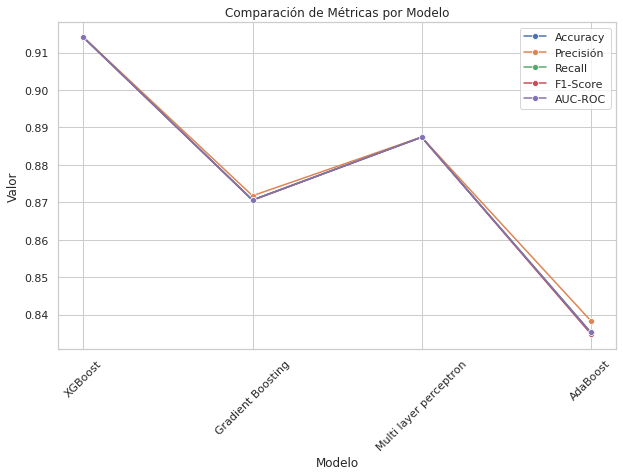

In [301]:
# Definir los modelos
modelos = [
    ("XGBoost", xgb_model),
    ("Gradient Boosting", gb),
    ("Multi layer perceptron", mlp),
    ("AdaBoost", adaboost)
]  
# Crear una lista para almacenar los resultados
resultados = []

# Evaluar cada modelo y almacenar las métricas en la lista de resultados
for nombre, modelo in modelos:
    # Ajustar el modelo a los datos de entrenamiento
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')
    
    resultados.append({
        'Modelo': nombre,
        'Accuracy': accuracy,
        'Precisión': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    })

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Configurar el tamaño y diseño del gráfico
plt.figure(figsize=(10, 6))

# Graficar cada métrica por separado para cada modelo
for metrica in ['Accuracy', 'Precisión', 'Recall', 'F1-Score', 'AUC-ROC']:
    sns.lineplot(data=df_resultados, x='Modelo', y=metrica, marker='o', label=metrica)

# Configurar las etiquetas de los ejes y la leyenda
plt.title('Comparación de Métricas por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()


La mejor tenica es XGB, a continuación realizaremos la aplicación de los mejores hiperparametros

## Etapa 5: Mejores Hiperparametros XGB 

In [302]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a buscar
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Definir el modelo
xgb_model = xgb.XGBClassifier()

# Realizar la búsqueda de hiperparámetros mediante validación cruzada
search = GridSearchCV(xgb_model, param_grid, scoring='f1', cv=5)
search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = search.best_params_

# Entrenar el modelo con los mejores hiperparámetros en los datos de entrenamiento completos
xgb_model_best = xgb.XGBClassifier(**best_params)
xgb_model_best.fit(X_train, y_train)

# Evaluar el modelo con los mejores hiperparámetros en los datos de prueba
y_pred = xgb_model_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')

# Imprimir las métricas del modelo con los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_params)
print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)


Mejores hiperparámetros encontrados: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.9152440850554058
Precisión: 0.9153680966095211
Recall: 0.9152440850554058
F1-Score: 0.915237029600097
AUC-ROC: 0.9152362131838516
